In [42]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

#### Generate Coordinates

In [43]:
min_x = int(-2*np.pi*10000)
max_x = int(2*np.pi*10000)
min_n = int(-0.2*10000)
max_n = int(0.2*10000)
X = np.sort(np.random.randint(min_x, max_x, (1,1000))/10000)
n = np.random.randint(min_n, max_n, (1,1000))/10000
y = np.sin(X)
y = y + n
coord = pd.DataFrame()
x_df= pd.DataFrame(X.T, columns=['x'])
y_df= pd.DataFrame(y.T, columns=['y'])
coord = pd.concat([x_df,y_df], axis =1)
# X = np.sort(5 * np.random.rand(40, 1), axis=0)

In [44]:
# scaler = StandardScaler()
# scaler.fit(x_df)
# x_df_scaled = scaler.transform(x_df)

# scaler.fit(y_df)
# y_df_scaled = scaler.transform(y_df)

In [45]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=0.2)
svr_preds = svr_rbf.fit(x_df, y_df).predict(X.T)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


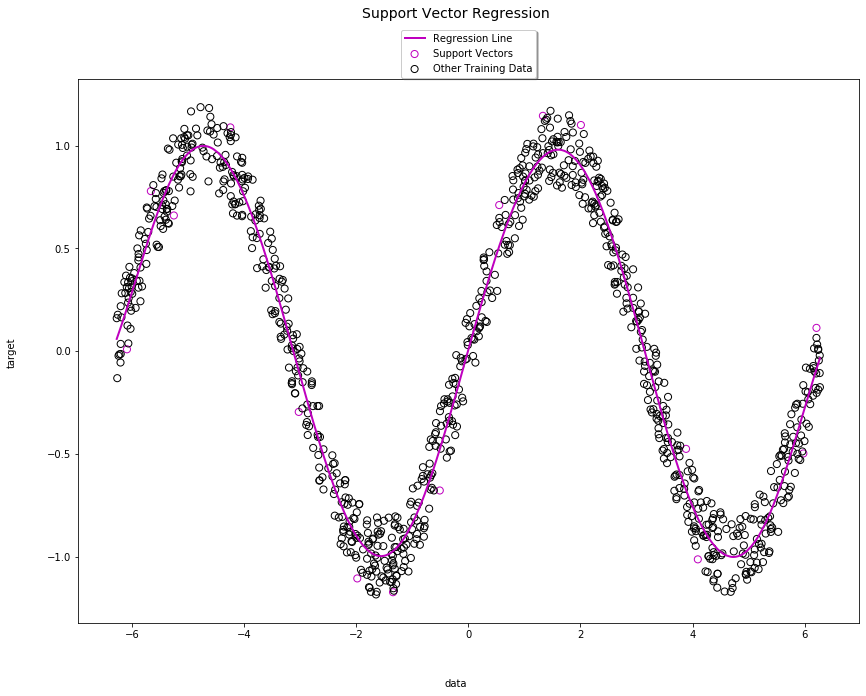

<Figure size 432x288 with 0 Axes>

In [14]:
lw = 2
y=y_df.values.ravel()
X=x_df['x']
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 10), sharey=True)
axes.plot(X, svr_preds, color='m', lw=lw,
              label='Regression Line')

axes.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolor="none",
                 edgecolor='m', s=50,
                 label='Support Vectors')
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
                 y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
                 facecolor="none", edgecolor="k", s=50,
                 label='Other Training Data')
axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()
plt.savefig('SVM Q3 Train Set Cam.png',bbox_inches = 'tight');

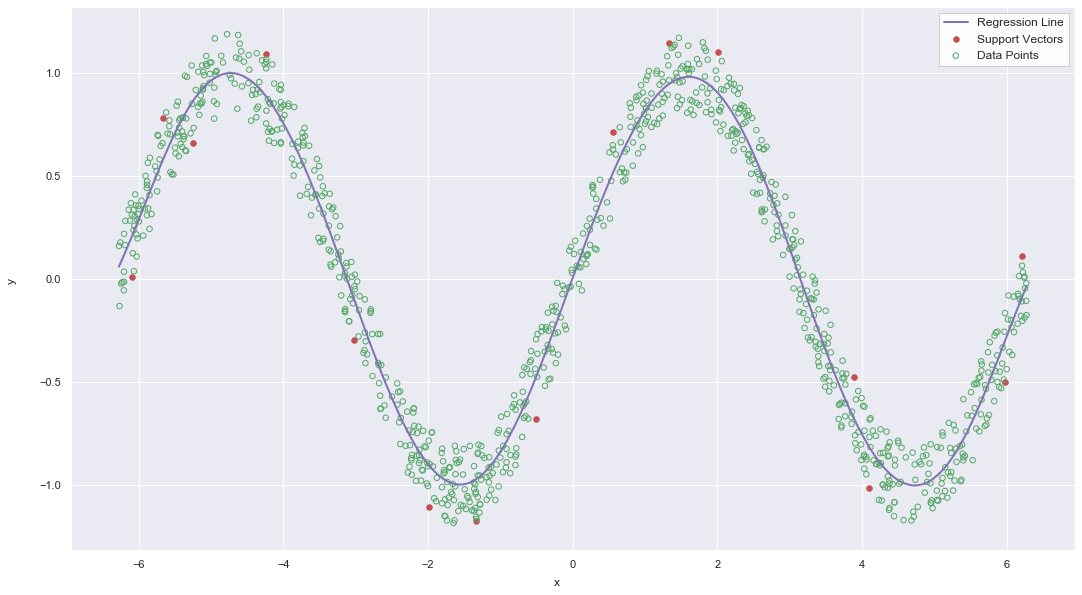

<Figure size 432x288 with 0 Axes>

In [41]:
sns.set()
lw = 2
y=y_df.values.ravel()
X=x_df['x']
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 10), sharey=True)
axes.plot(X, svr_preds, color='m', lw=lw,
              label='Regression Line')

axes.scatter(X[svr_rbf.support_], y[svr_rbf.support_], facecolor="r",
                 edgecolor='r', s=30,
                 label='Support Vectors')
axes.scatter(X[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
                 y[np.setdiff1d(np.arange(len(X)), svr_rbf.support_)],
                 facecolor="none", edgecolor="g", s=30,
                 label='Data Points')
axes.legend(loc='best',framealpha = 0.9, facecolor='w',fontsize='medium',
                ncol=1, fancybox=False, shadow=False)

fig.text(0.5, 0.08, 'x', ha='center', va='center')
fig.text(0.08, 0.5, 'y', ha='center', va='center', rotation='vertical')
# fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()
plt.savefig('SVM Q5 Test Set Chris.png',bbox_inches = 'tight');